# Student Alcohol Consumption Analysiss

## Introduction
This Jupyter Notebook aims to analyze the factors influencing alcohol consumption among secondary school students. By exploring the dataset, we will gain insights into how various social, educational, and personal factors affect students' alcohol consumption patterns and academic performance.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [ ]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [10]:
# Paths to the CSV files
path_data_math = '../data/student-mat.csv'
path_data_port = '../data/student-mat.csv'

# Reading the CSV files
data_math = pd.read_csv(path_data_math)
data_port = pd.read_csv(path_data_port)

In [ ]:
# Display the first few rows of each dataset to verify the reading
print("Mathematics Data:")
print(data_math.head())
print("\nPortuguese Data:")
print(data_port.head())

In [13]:
# Concatenating the two DataFrames
# The ignore_index=True parameter renumbers the indices in the resulting DataFrame
combined_data = pd.concat([data_math, data_port], ignore_index=True)

# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", combined_data.shape)


Shape of Combined Data: (790, 33)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [14]:
# 1. Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [15]:
# 2. Check data types
data_types = combined_data.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [21]:
# 3. Correcting Data Types for Categorical Variables

# List the columns to convert to categorical
columns_to_convert = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher',
    'internet', 'romantic', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
    'Walc', 'health', 'Medu', 'Fedu'
]

# Convert the specified columns to 'category' type
combined_data[columns_to_convert] = combined_data[columns_to_convert].astype('category')

# Check the data types after conversion
print("Updated Data Types of Each Column:")
print(combined_data.dtypes)

Updated Data Types of Each Column:
school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures      category
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


In [26]:
# 4. Summary statistics for numerical columns
summary_statistics = combined_data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
               age    absences          G1          G2          G3
count  790.000000  790.000000  790.000000  790.000000  790.000000
mean    16.696203    5.708861   10.908861   10.713924   10.415190
std      1.275234    7.998022    3.317091    3.759120    4.578538
min     15.000000    0.000000    3.000000    0.000000    0.000000
25%     16.000000    0.000000    8.000000    9.000000    8.000000
50%     17.000000    4.000000   11.000000   11.000000   11.000000
75%     18.000000    8.000000   13.000000   13.000000   14.000000
max     22.000000   75.000000   19.000000   19.000000   20.000000


In [34]:
# 5. Check unique values in categorical columns
for column in combined_data.select_dtypes(include=['category']).columns:
    print(f"\nUnique Values in '{column}':\n", combined_data[column].value_counts())


Unique Values in 'school':
 school
GP    698
MS     92
Name: count, dtype: int64

Unique Values in 'sex':
 sex
F    416
M    374
Name: count, dtype: int64

Unique Values in 'address':
 address
U    614
R    176
Name: count, dtype: int64

Unique Values in 'famsize':
 famsize
GT3    562
LE3    228
Name: count, dtype: int64

Unique Values in 'Pstatus':
 Pstatus
T    708
A     82
Name: count, dtype: int64

Unique Values in 'Medu':
 Medu
4    262
2    206
3    198
1    118
0      6
Name: count, dtype: int64

Unique Values in 'Fedu':
 Fedu
2    230
3    200
4    192
1    164
0      4
Name: count, dtype: int64

Unique Values in 'Mjob':
 Mjob
other       282
services    206
at_home     118
teacher     116
health       68
Name: count, dtype: int64

Unique Values in 'Fjob':
 Fjob
other       434
services    222
teacher      58
at_home      40
health       36
Name: count, dtype: int64

Unique Values in 'reason':
 reason
course        290
home          218
reputation    210
other          72
Name

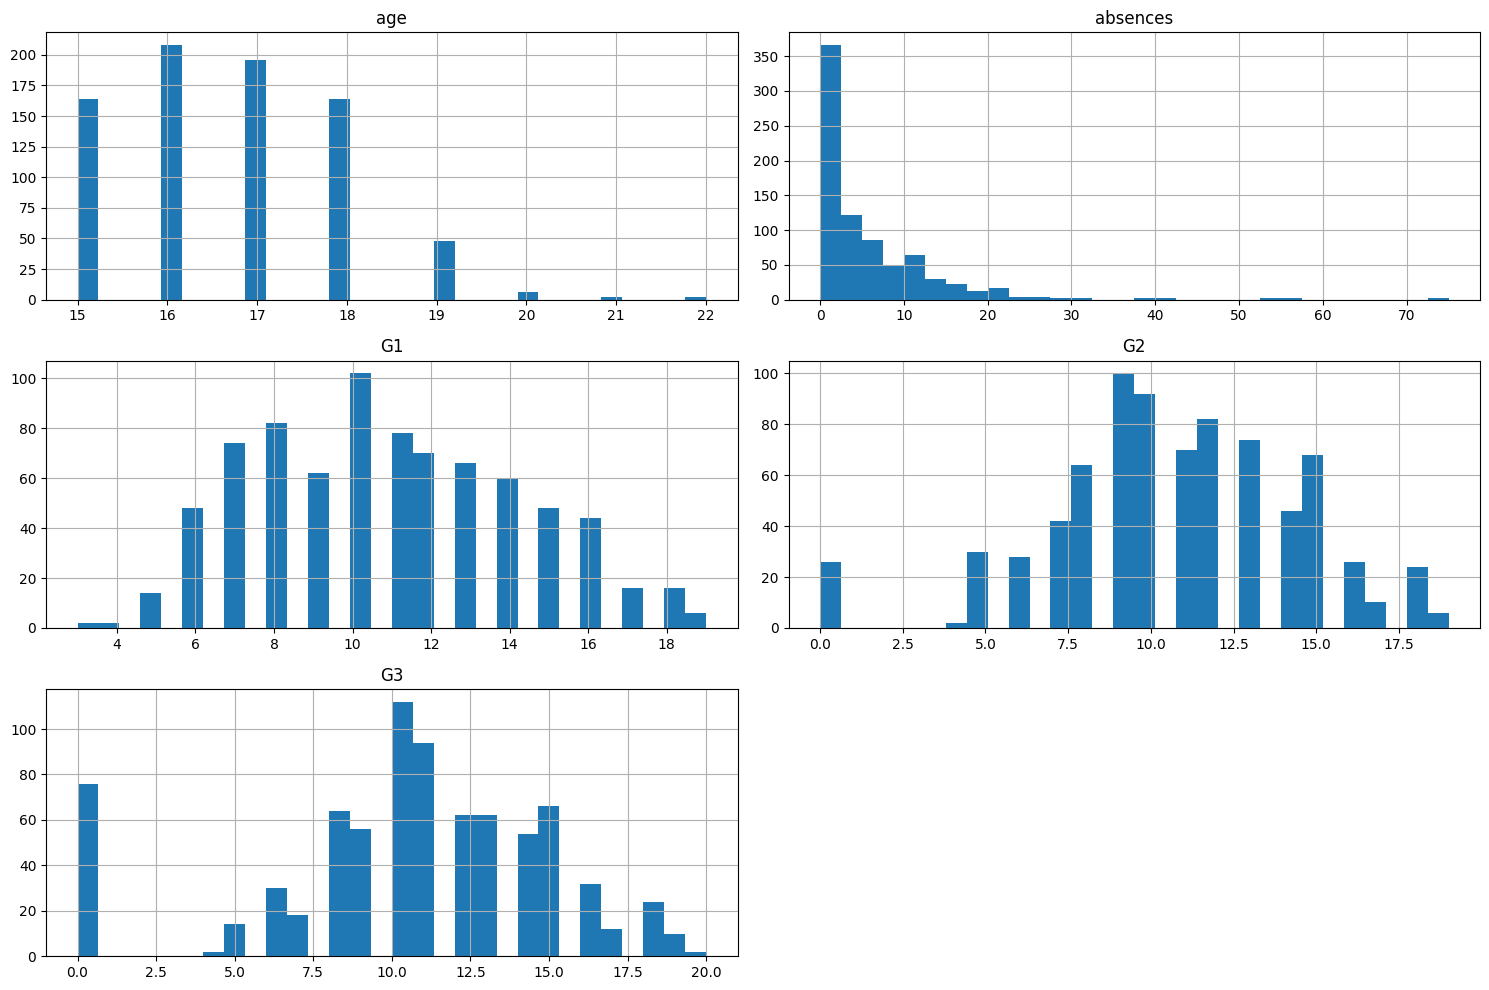

In [35]:
# 6. Visualize distributions for numerical columns using histograms
combined_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

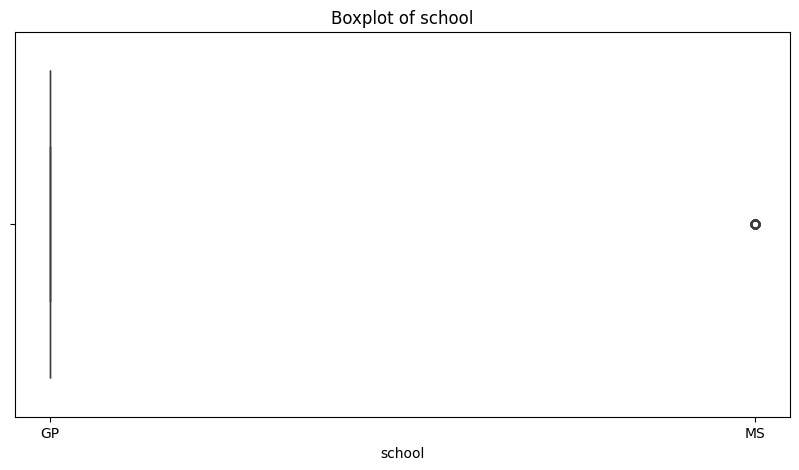

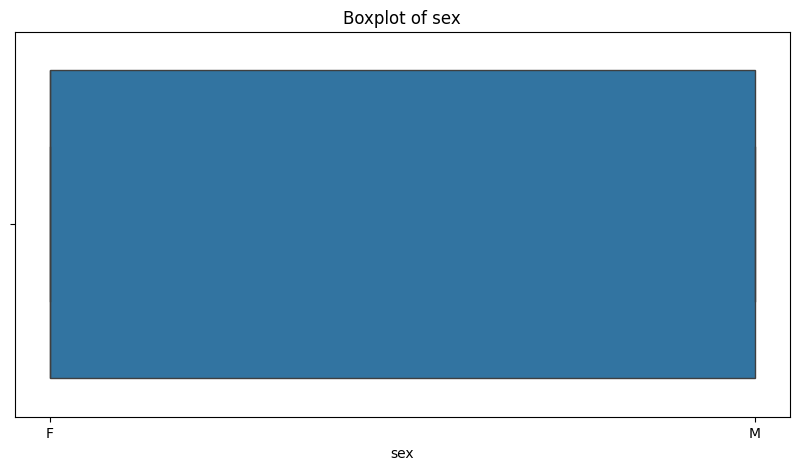

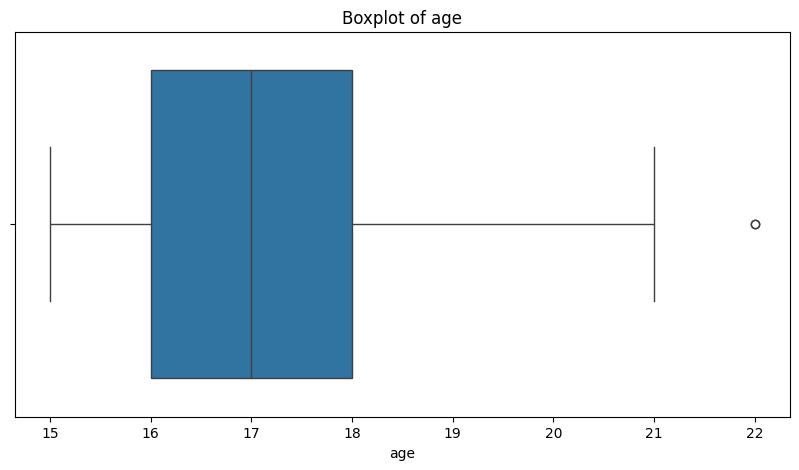

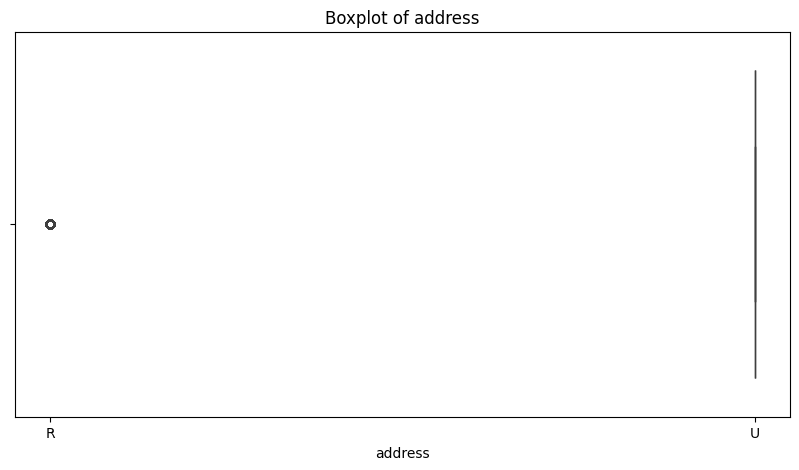

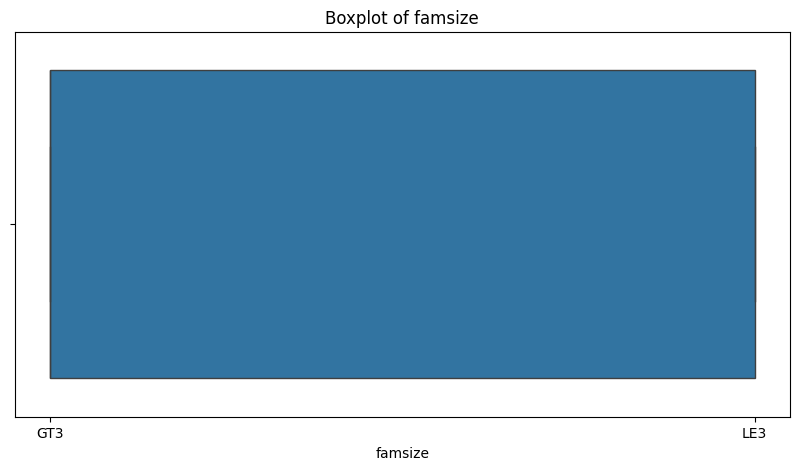

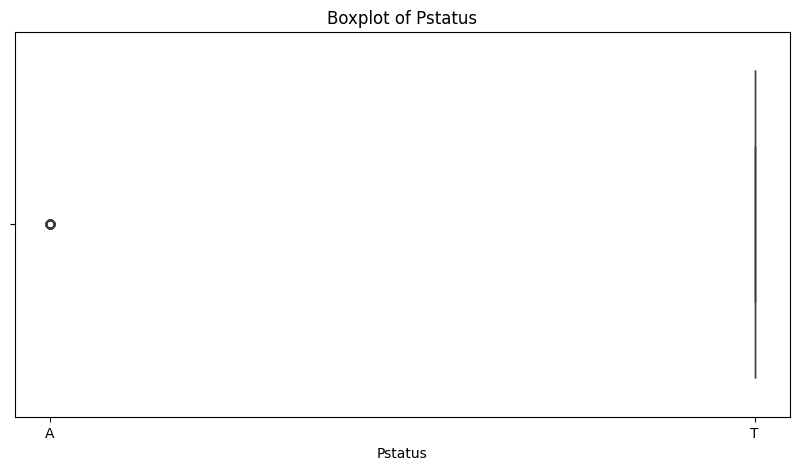

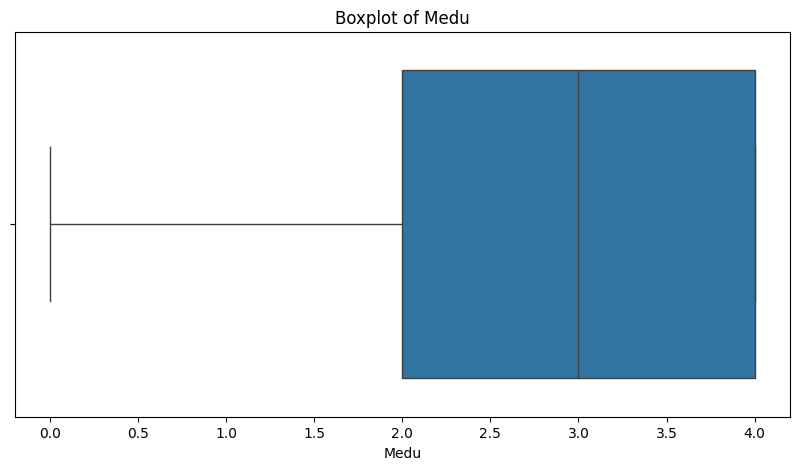

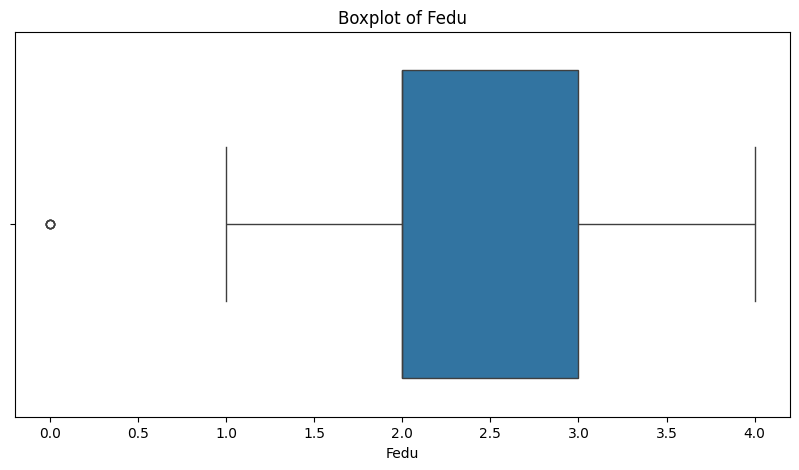

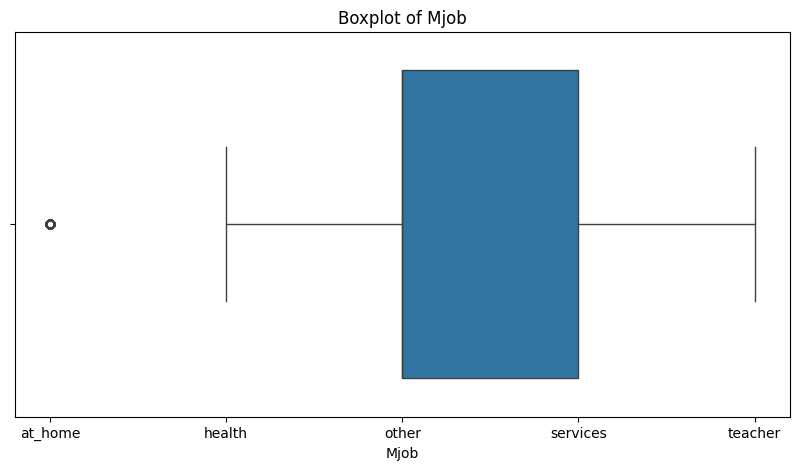

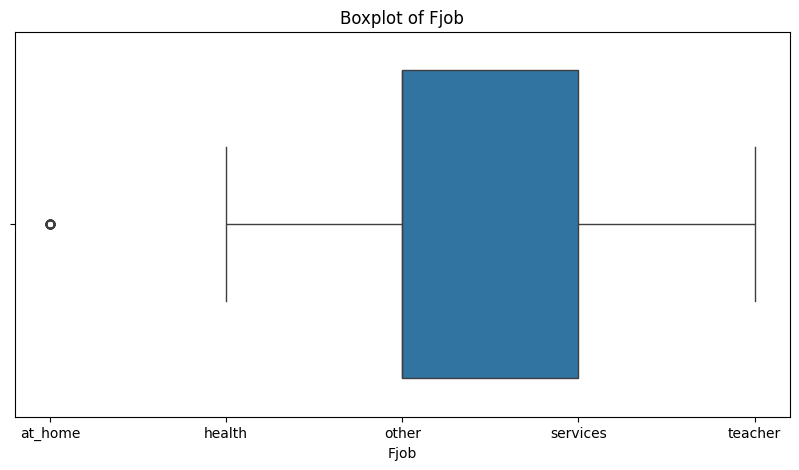

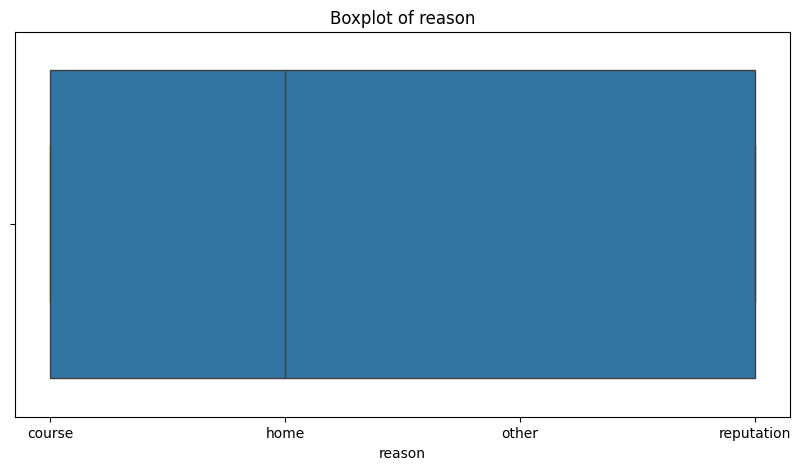

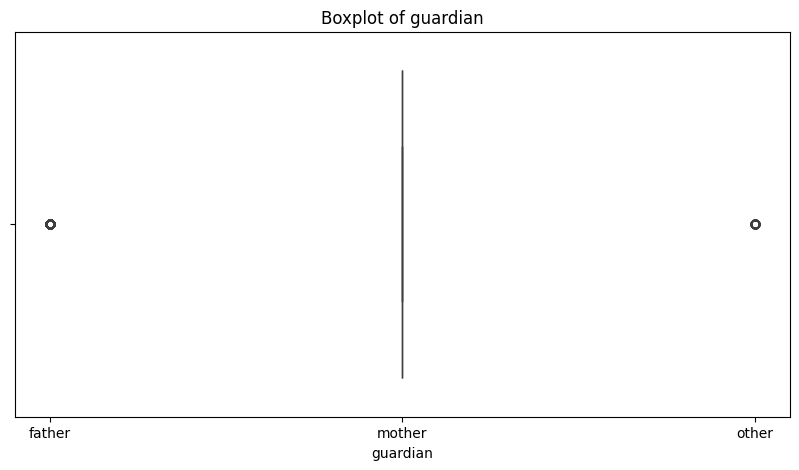

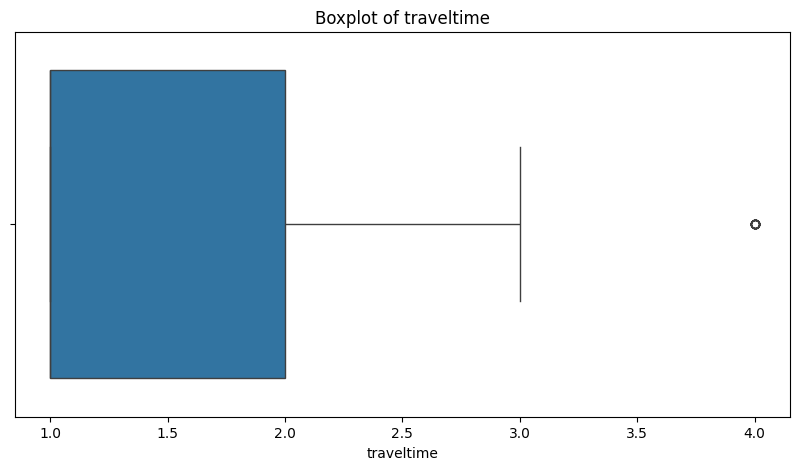

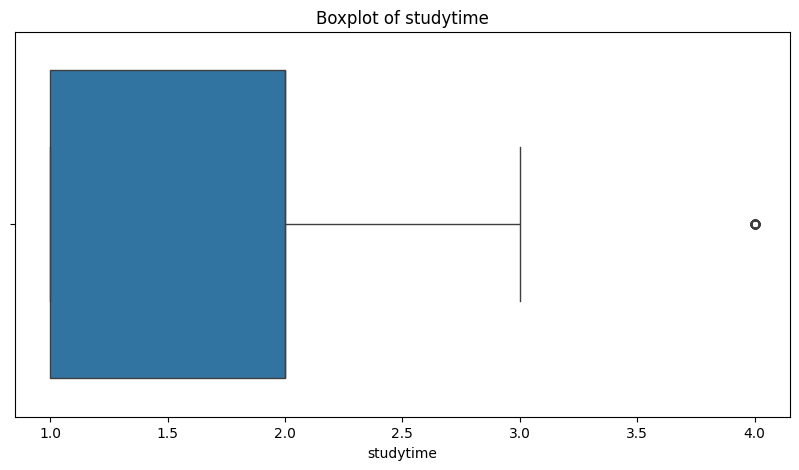

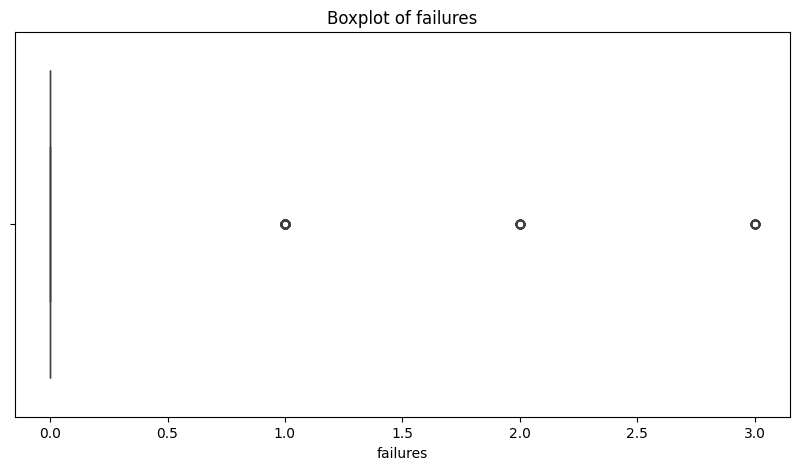

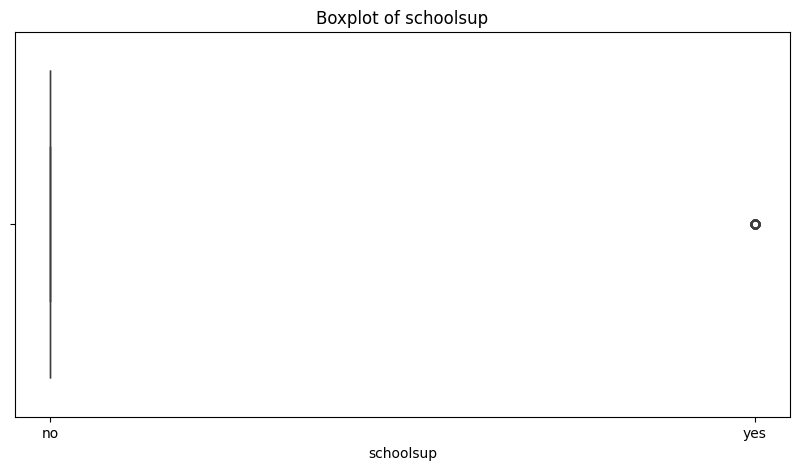

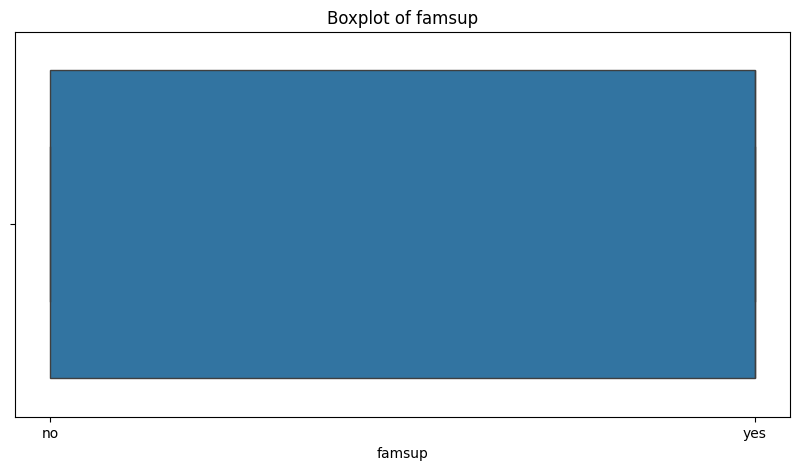

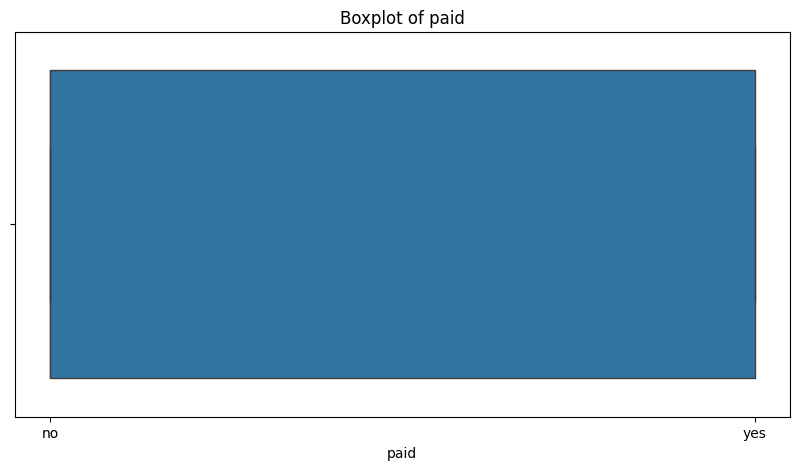

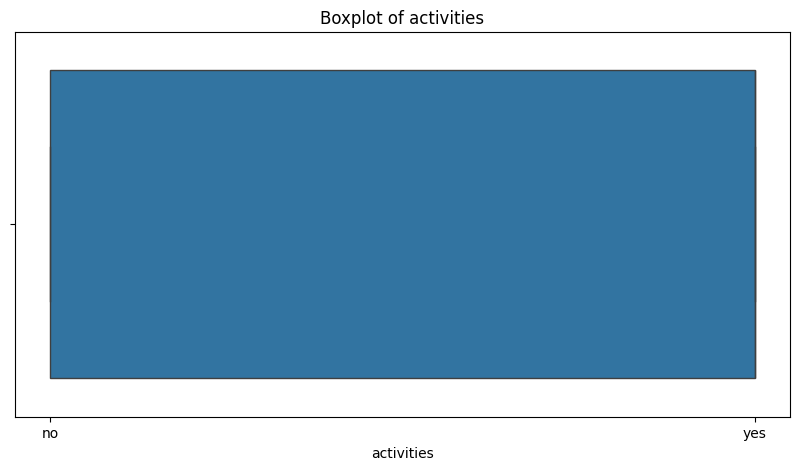

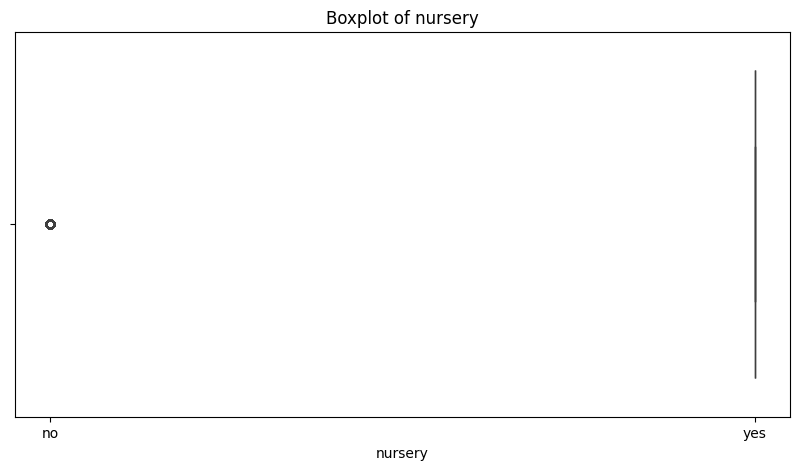

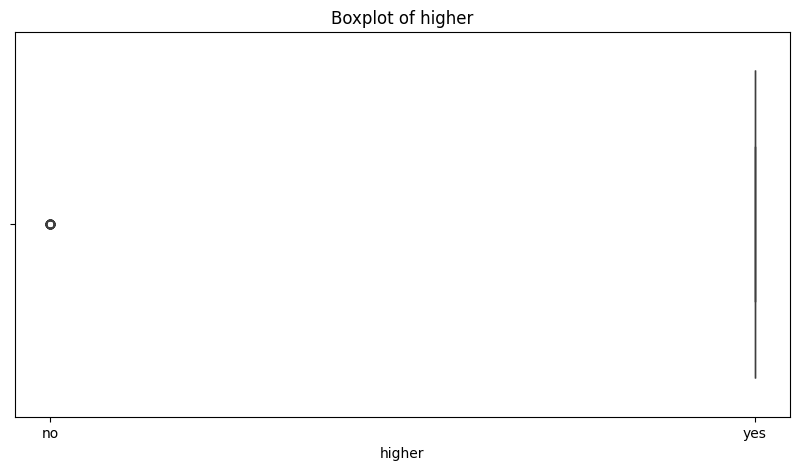

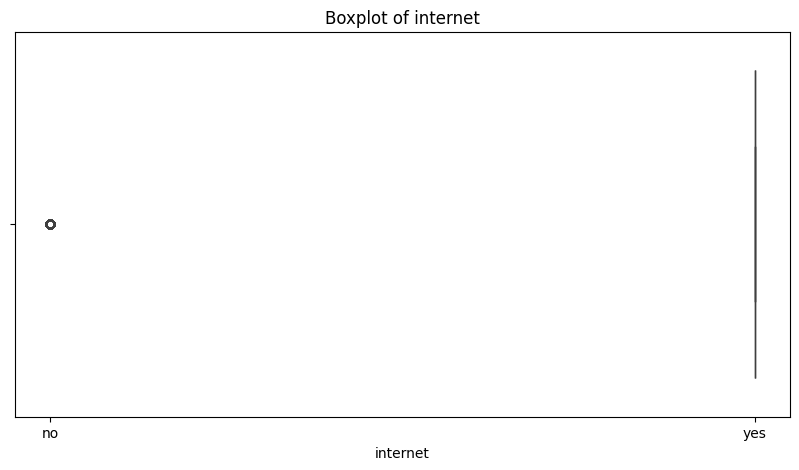

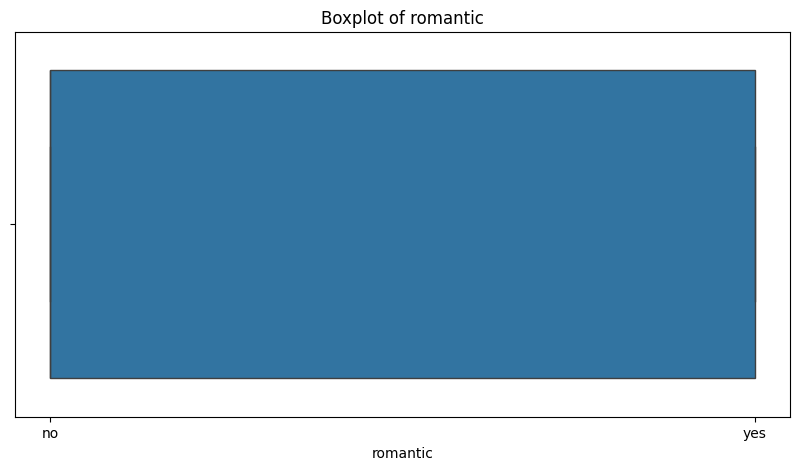

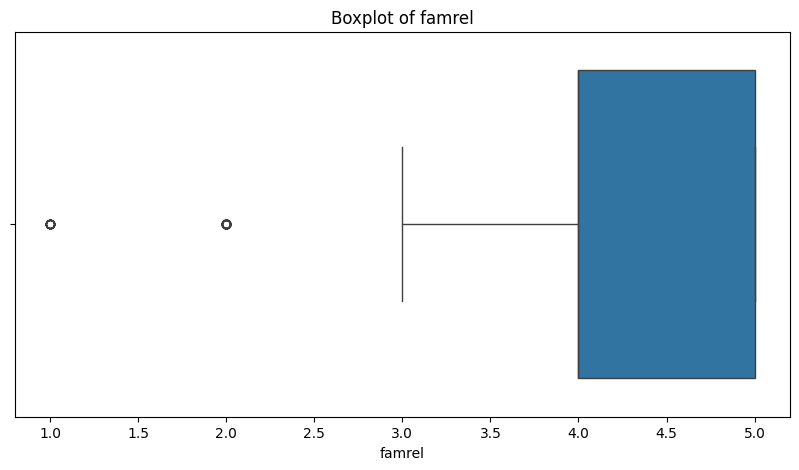

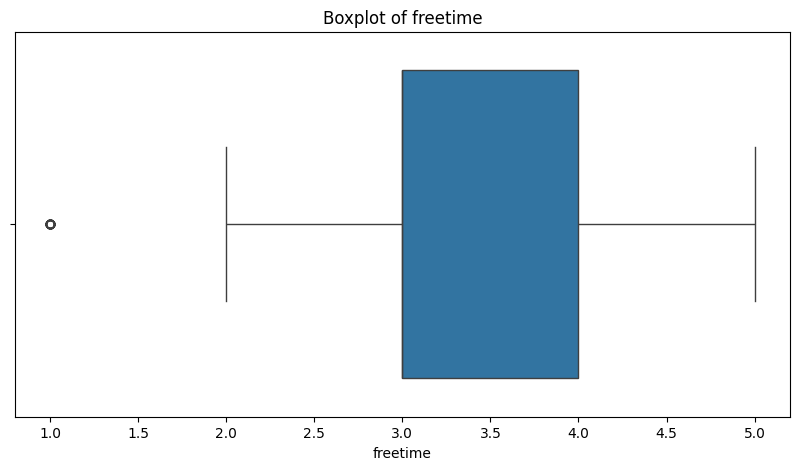

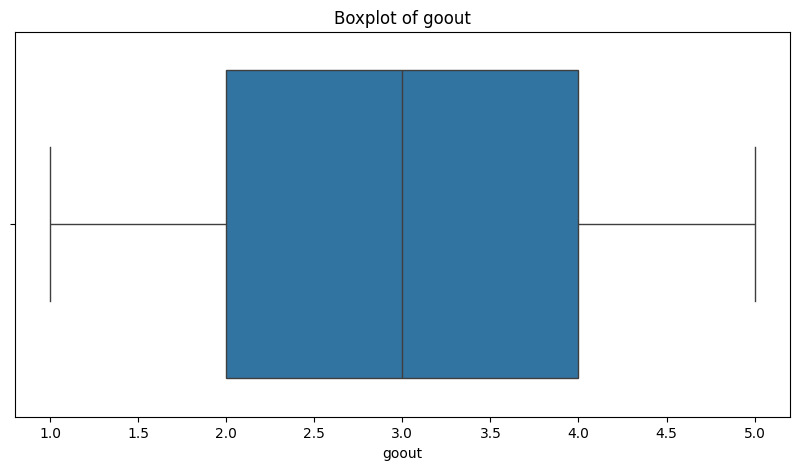

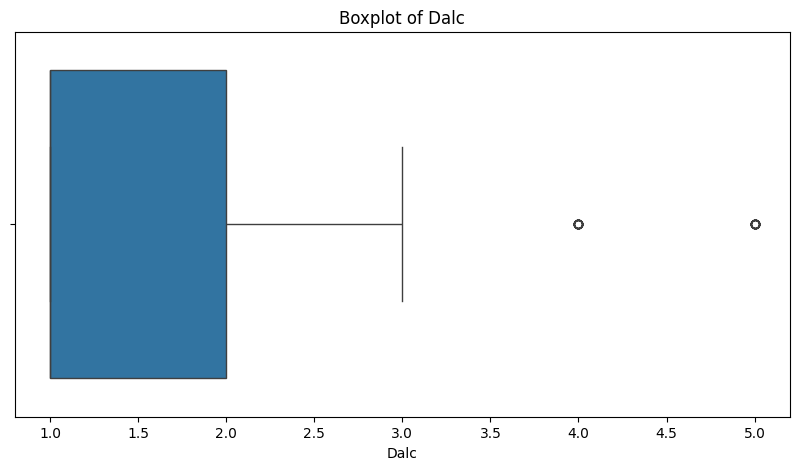

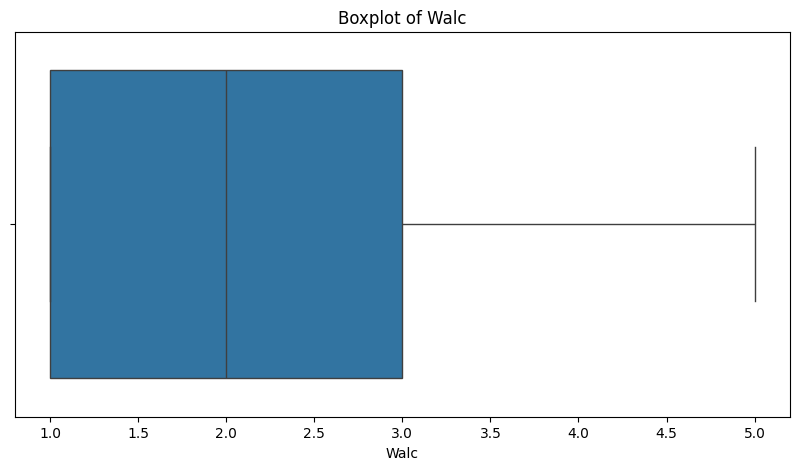

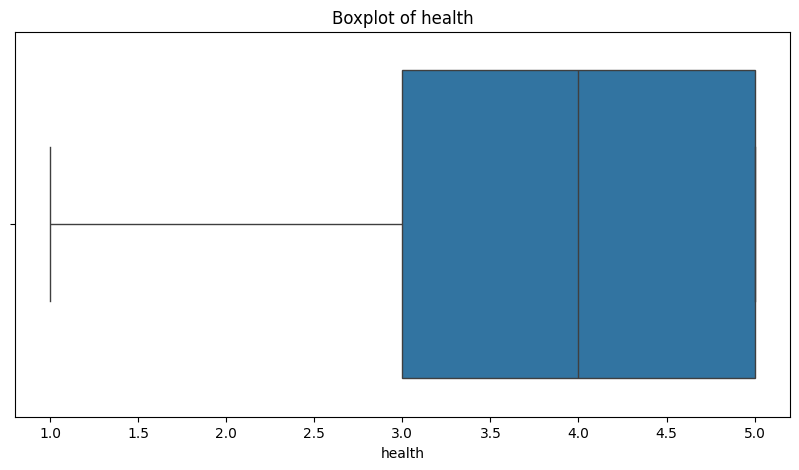

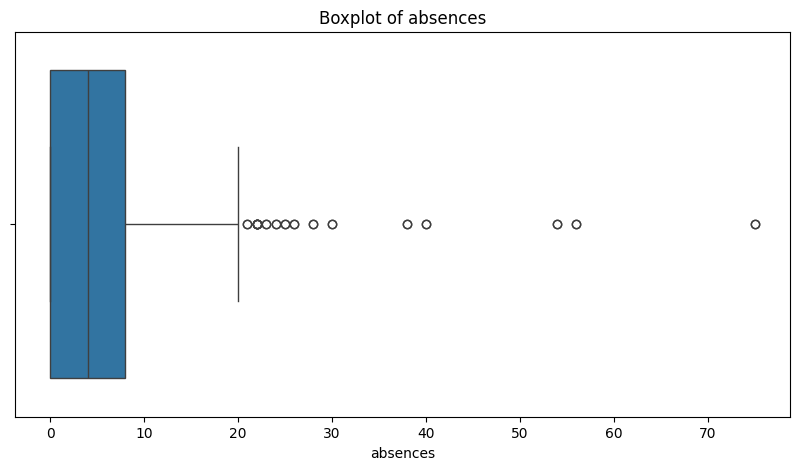

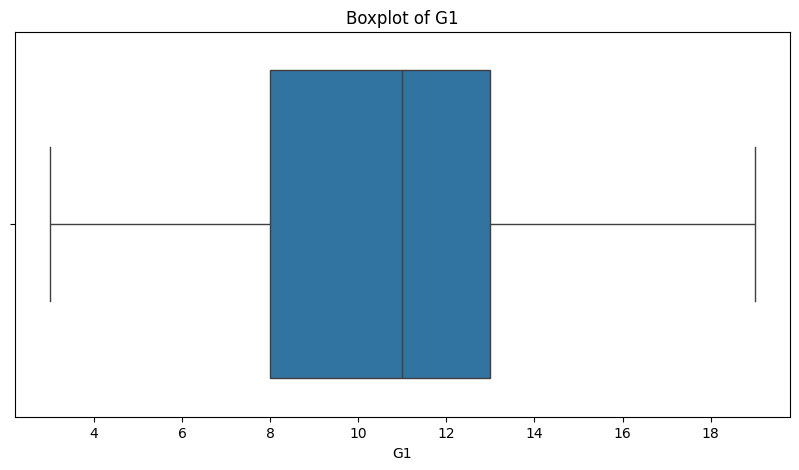

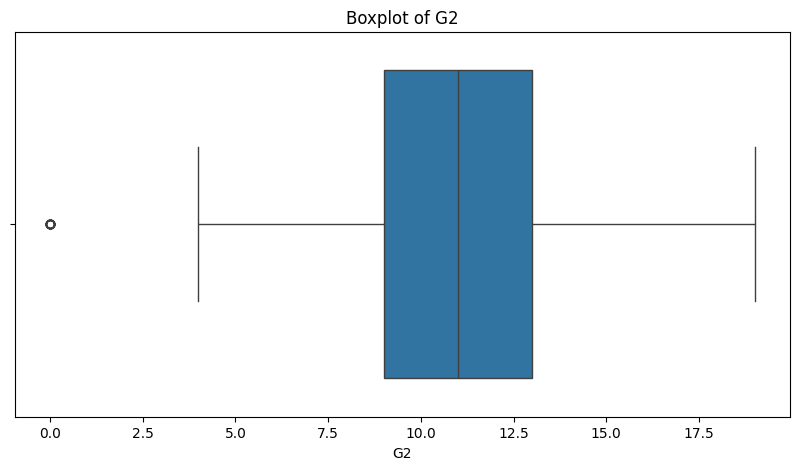

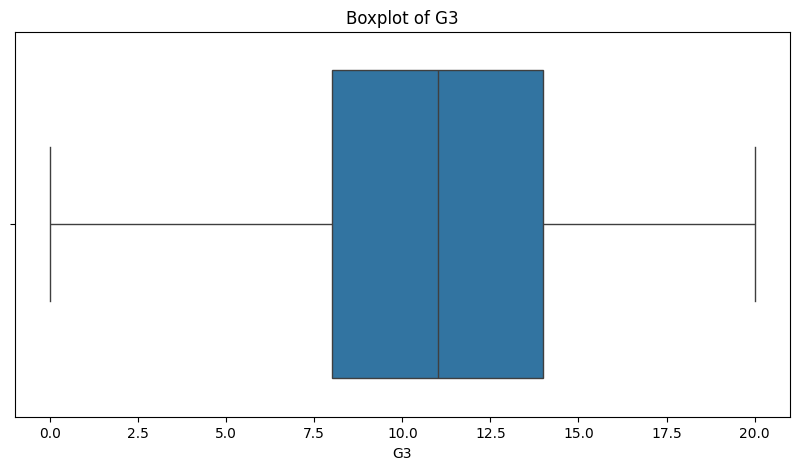

In [25]:
# 6. Create boxplots to check for outliers in numerical columns
for column in combined_data.select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=combined_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
# 7. Check for consistency in the 'age' column
age_outliers = combined_data[(combined_data['age'] < 0) | (combined_data['age'] > 100)]
print("\nOutliers in Age Column:\n", age_outliers)

## Data Visualization <a name="data-visualization"></a>
Data visualization is key to understanding trends and patterns in our data. In this cell, we will create various plots to visualize the relationships between different variables, including alcohol consumption and academic performance.

## Correlation Analysis <a name="correlation-analysis"></a>
We will analyze the correlations between numerical features in the dataset. This will help us identify which factors are most strongly related to alcohol consumption and academic performance.


## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.